# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement
---
This data science project aims to predict the price of houses in Ames, Iowa. We are given 80 variables on the quality and quantity of many physical attributes of individual residential properties in Ames, including their sale price, from property sales between 2006 and 2010.

## Executive Summary
---
### Contents:
- [1. Exploratory Data Analysis](#1.-Exploratory-Data-Analysis)
- [2. Data Cleaning](#2.-Data-Cleaning)
- [3. Exploratory Visualizations](#3.-Exploratory-Visualizations)
- [4. Pre-processing](#4.-Pre-processing)
- [5. Modeling](#5.-Modeling)
- [6. Inferential Visualizations](#6.-Inferential-Visualizations)
- [7. Business Recommendations](#7.-Business-Recommendations)

## 1. Exploratory Data Analysis
___

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.exceptions import DataConversionWarning
import fnmatch
import warnings

%matplotlib inline
sns.set(font_scale=1.5)
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
# Read data from csv, only missing values are interpreted as NaN
# NA values contain information according to the data description
train = pd.read_csv('../data/train.csv', na_values=[''], keep_default_na=False)
test = pd.read_csv('../data/test.csv', na_values=[''], keep_default_na=False)

# Print first 5 rows from train data set
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,nan,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.00,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.00,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.00,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.00,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [3]:
# Print first 5 rows from test data set
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.00,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,nan,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.00,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60.00,8520,Pave,NA,Reg,Lvl,...,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,nan,9500,Pave,NA,IR1,Lvl,...,0,185,0,NA,NA,NA,0,7,2009,WD


In [4]:
# Print shape of data sets
print('Train data set shape: {}\nTest data set shape: {}'.format(train.shape, test.shape))

Train data set shape: (2051, 81)
Test data set shape: (879, 80)


In [5]:
# Breakdown columns by their type (train data)
train.columns.to_series().groupby(train.dtypes).groups

{dtype('int64'): Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath',
        'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
        'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
        'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
        'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
       dtype='object'),
 dtype('O'): Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
        'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1s

In [6]:
# Breakdown columns by their type for (test data)
test.columns.to_series().groupby(test.dtypes).groups

{dtype('int64'): Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'BsmtFin SF 2',
        'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
        'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
        'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
        'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
        'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
       dtype='object'),
 dtype('float64'): Index(['Lot Frontage', 'Mas Vnr Area', 'Garage Yr Blt'], dtype='object'),
 dtype('O'): Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
        'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1st', 'Exterior 2nd', 'Mas Vnr

In [7]:
# Print descriptive statistics for numerical variables (train data)
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,"2,051.00","1,474.03",843.98,1.00,753.50,"1,486.00","2,198.00","2,930.00"
PID,"2,051.00","713,590,006.09","188,691,837.89","526,301,100.00","528,458,140.00","535,453,200.00","907,180,080.00","924,152,030.00"
MS SubClass,"2,051.00",57.01,42.82,20.00,20.00,50.00,70.00,190.00
Lot Frontage,"1,721.00",69.06,23.26,21.00,58.00,68.00,80.00,313.00
Lot Area,"2,051.00","10,065.21","6,742.49","1,300.00","7,500.00","9,430.00","11,513.50","159,000.00"
Overall Qual,"2,051.00",6.11,1.43,1.00,5.00,6.00,7.00,10.00
Overall Cond,"2,051.00",5.56,1.10,1.00,5.00,5.00,6.00,9.00
Year Built,"2,051.00","1,971.71",30.18,"1,872.00","1,953.50","1,974.00","2,001.00","2,010.00"
Year Remod/Add,"2,051.00","1,984.19",21.04,"1,950.00","1,964.50","1,993.00","2,004.00","2,010.00"
Mas Vnr Area,"2,029.00",99.70,174.96,0.00,0.00,0.00,161.00,"1,600.00"


In [8]:
# Explore suspicious max value for Garage Yr Blt (train data)
train.loc[[train['Garage Yr Blt'].idxmax()]][['Garage Yr Blt', 'Year Built', 'Year Remod/Add']]

,Garage Yr Blt,Year Built,Year Remod/Add
1699,"2,207.00",2006,2007


We will assume data entry mistake for `Garage Yr Blt` and fix it with the value from `Year Remod/Add` (remodel date).

In [9]:
# Print descriptive statistics for numerical variables (test data)
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,879.00,"1,445.59",850.72,2.00,692.50,"1,435.00","2,197.00","2,928.00"
PID,879.00,"716,504,975.75","188,913,523.89","526,302,110.00","528,486,085.00","535,454,160.00","907,192,140.00","1,007,100,110.00"
MS SubClass,879.00,58.27,42.21,20.00,20.00,50.00,70.00,190.00
Lot Frontage,719.00,69.63,23.63,21.00,59.00,68.00,80.00,182.00
Lot Area,879.00,"10,340.92","10,047.34","1,477.00","7,298.50","9,453.00","11,606.50","215,245.00"
Overall Qual,879.00,6.05,1.37,2.00,5.00,6.00,7.00,10.00
Overall Cond,879.00,5.57,1.13,1.00,5.00,5.00,6.00,9.00
Year Built,879.00,"1,970.53",30.40,"1,880.00","1,954.00","1,972.00","2,000.00","2,010.00"
Year Remod/Add,879.00,"1,984.44",20.45,"1,950.00","1,967.00","1,992.00","2,003.00","2,010.00"
Mas Vnr Area,878.00,106.98,188.36,0.00,0.00,0.00,173.50,"1,378.00"


In [10]:
# Print descriptive statistics for categorical variables (train data)
train.describe(include=['O', 'category']).T

,count,unique,top,freq
MS Zoning,2051,7,RL,1598
Street,2051,2,Pave,2044
Alley,2051,3,NA,1911
Lot Shape,2051,4,Reg,1295
Land Contour,2051,4,Lvl,1843
Utilities,2051,3,AllPub,2049
Lot Config,2051,5,Inside,1503
Land Slope,2051,3,Gtl,1953
Neighborhood,2051,28,NAmes,310
Condition 1,2051,9,Norm,1767


In [11]:
# Print descriptive statistics for categorical variables (test data)
test.describe(include=['O', 'category']).T

,count,unique,top,freq
MS Zoning,879,6,RL,675
Street,879,2,Pave,874
Alley,879,3,NA,821
Lot Shape,879,4,Reg,564
Land Contour,879,4,Lvl,790
Utilities,879,2,AllPub,878
Lot Config,879,5,Inside,637
Land Slope,879,3,Gtl,836
Neighborhood,879,26,NAmes,133
Condition 1,879,9,Norm,755


In [12]:
# Print column names with nulls and the counts (train data)
total_nulls = train.isnull().sum().sort_values(ascending=False)
total_nulls = [total_nulls[total_nulls > 0]]
total_nulls

[Lot Frontage      330
 Garage Yr Blt     114
 Mas Vnr Type       22
 Mas Vnr Area       22
 Bsmt Exposure       4
 BsmtFin Type 2      2
 Bsmt Half Bath      2
 Bsmt Full Bath      2
 Garage Cond         1
 Bsmt Cond           1
 BsmtFin Type 1      1
 Garage Finish       1
 Garage Cars         1
 Garage Area         1
 BsmtFin SF 2        1
 Garage Qual         1
 BsmtFin SF 1        1
 Bsmt Qual           1
 Total Bsmt SF       1
 Bsmt Unf SF         1
 dtype: int64]

In [13]:
# Print column names with nulls and the counts (test data)
total_nulls = test.isnull().sum().sort_values(ascending=False)
total_nulls = [total_nulls[total_nulls > 0]]
total_nulls

[Lot Frontage     160
 Garage Yr Blt     45
 Mas Vnr Area       1
 Garage Finish      1
 Electrical         1
 Mas Vnr Type       1
 dtype: int64]

In [14]:
# Investigate rows with missing value in Lot Frontage (train data)
# Use fnmatch for simple wildcard pattern matching to display all Lot-related columns
filtered = fnmatch.filter(train.columns, 'Lot*')
train[train['Lot Frontage'].isnull()][filtered].head(10)

,Lot Frontage,Lot Area,Lot Shape,Lot Config
0,nan,13517,IR1,CulDSac
7,nan,12160,IR1,Inside
8,nan,15783,Reg,Inside
23,nan,7980,IR1,Inside
27,nan,11700,IR1,Inside
31,nan,11435,IR1,Corner
42,nan,9101,IR1,Corner
50,nan,2998,Reg,Inside
59,nan,15038,IR2,Corner
62,nan,20062,IR1,Inside


In [15]:
# Investigate rows with missing value in Lot Frontage (test data)
test[test['Lot Frontage'].isnull()][filtered].head(10)

,Lot Frontage,Lot Area,Lot Shape,Lot Config
1,nan,9662,IR1,Inside
4,nan,9500,IR1,Inside
7,nan,9286,IR1,CulDSac
13,nan,7976,Reg,Inside
20,nan,8246,IR1,Inside
21,nan,8499,IR1,Corner
23,nan,21453,IR1,CulDSac
26,nan,12513,IR1,FR2
30,nan,7340,IR1,Inside
37,nan,9000,Reg,Inside


In [16]:
# Do these properties have attached garages?
train[train['Lot Frontage'].isnull()][['Lot Frontage', 'Garage Type']].head(10)

,Lot Frontage,Garage Type
0,nan,Attchd
7,nan,Attchd
8,nan,Detchd
23,nan,Attchd
27,nan,Detchd
31,nan,Detchd
42,nan,Attchd
50,nan,Detchd
59,nan,Attchd
62,nan,Attchd


Missing values for `Lot Frontage` could mean that property has no street connected to it. However, some of these properties have attached garages, suggesting that we cannot fill all missing values as `0`. We will take a simple approach and impute with the median.

In [17]:
# Investigate rows with missing value in Garage Yr Blt (train data)
filtered = fnmatch.filter(train.columns, 'Garage*')
train[train['Garage Yr Blt'].isnull()][filtered].head(10)

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,NA,nan,NA,0.00,0.00,NA,NA
53,NA,nan,NA,0.00,0.00,NA,NA
65,NA,nan,NA,0.00,0.00,NA,NA
79,NA,nan,NA,0.00,0.00,NA,NA
101,NA,nan,NA,0.00,0.00,NA,NA
103,NA,nan,NA,0.00,0.00,NA,NA
114,NA,nan,NA,0.00,0.00,NA,NA
120,NA,nan,NA,0.00,0.00,NA,NA
134,NA,nan,NA,0.00,0.00,NA,NA
136,NA,nan,NA,0.00,0.00,NA,NA


Missing value for `Garage Yr Blt` means property has no garage and it is not built in any year. We cannot impute with `0` as it does not make any sense for a garage to be built in the year 0. We will take a simple approach and impute with the median.

In [18]:
# Investigate row with missing value in Garage Qual (train data)
train[train['Garage Qual'].isnull()][filtered]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,Detchd,nan,NaN,nan,nan,NaN,NaN


There is one property with value for `Garage Type` but missing values for other Garage-related variables. We will assume data entry mistake and that this property has no garage.

In [19]:
# Investigate row with missing value in Garage Finish (test data)
test[test['Garage Finish'].isnull()][filtered]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
765,Detchd,nan,NaN,1,360,NA,NA


For row index 765 in the test data, we will assume data entry mistake and that this property has no garage.

In [20]:
# Investigate rows with missing value in Mas Vnr Type (train data)
filtered = fnmatch.filter(train.columns, 'Mas*')
train[train['Mas Vnr Type'].isnull()][filtered]

,Mas Vnr Type,Mas Vnr Area
22,NaN,nan
41,NaN,nan
86,NaN,nan
212,NaN,nan
276,NaN,nan
338,NaN,nan
431,NaN,nan
451,NaN,nan
591,NaN,nan
844,NaN,nan


In [21]:
# Investigate row with missing value in Mas Vnr Type (test data)
test[test['Mas Vnr Type'].isnull()][filtered]

,Mas Vnr Type,Mas Vnr Area
866,NaN,nan


Missing values for `Mas Vnr Type` and `Mas Vnr Area` are in the same rows. We will assume these properties have no masonry veneer by imputing with `None` and `0` respectively.

In [22]:
# Investigate rows with missing values in Bsmt Exposure (train data)
filtered = fnmatch.filter(train.columns, '*Bsmt*')
train[train['Bsmt Exposure'].isnull()][filtered]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1327,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan
1456,Gd,TA,NaN,Unf,0.00,Unf,0.00,725.00,725.00,0.00,0.00
1547,Gd,TA,NaN,Unf,0.00,Unf,0.00,"1,595.00","1,595.00",0.00,0.00
1997,Gd,TA,NaN,Unf,0.00,Unf,0.00,936.00,936.00,0.00,0.00


We do not have any Basement-related information for property in row index 1327. We will assume this property has no basement. For the other 3 properties with missing value under basement exposure, we will impute with the most frequent value (excluding NA).

In [23]:
# Investigate rows with missing value in BsmtFin Type 2 (train data)
train[train['BsmtFin Type 2'].isnull()][filtered]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1147,Gd,TA,No,GLQ,"1,124.00",NaN,479.00,"1,603.00","3,206.00",1.00,0.00
1327,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan


Property in row index 1147 has a Type 2 Basement, but has missing value regarding its rating. We will impute with the most frequent value (excluding NA).

In [24]:
# Investigate rows with missing value in Bsmt Half Bath (train data)
train[train['Bsmt Half Bath'].isnull()][filtered]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,NA,NA,NA,NA,0.00,NA,0.00,0.00,0.00,nan,nan
1327,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,nan,nan,nan


Since there is no basement for property in row index 616, we can assume that it has no basement bathrooms and impute with `0`.

In [25]:
# Investigate row with missing value in Electrical (test data)
test[test['Electrical'].isnull()][['Electrical']]

,Electrical
635,NaN


We will take a simple approach and impute with the most frequent value.

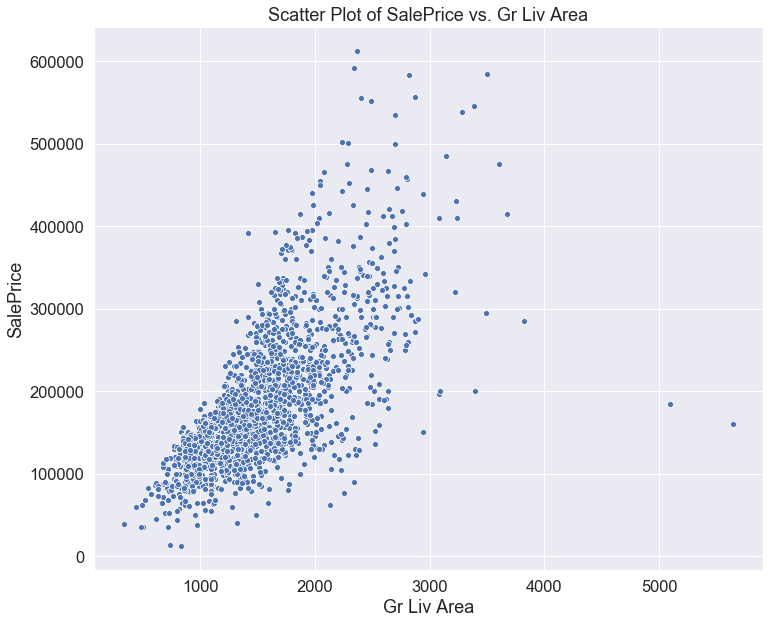

In [26]:
# Identify outliers
# Plot SalePrice against Gr Liv Area scatter plot
fig = plt.figure(figsize=(12,10), facecolor='white')
ax = sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=train)
ax.set_title('Scatter Plot of SalePrice vs. Gr Liv Area')
plt.show()

To identify any outliers quickly, the author of the dataset suggested plotting `SalePrice` versus `Gr Liv Area` . As expected, we see 2 ususual sales from houses larger than 5000 square feet. We will be defining them as outliers.

There are 23 nominal, 23 ordinal, 14 discrete and 20 continuous variables in the data set. 2 additional columns are observation identifiers.

The following table lists variables with categorical values. We may convert them into dummy variables during pre-processing.

Variable|Description
-|-
MS SubClass|Identifies the type of dwelling involved in the sale.
MS Zoning|Identifies the general zoning classification of the sale.
Street|Type of road access to property
Alley|Type of alley access to property
Land Contour|Flatness of the property
Lot Config|Lot configuration
Neighborhood|Physical locations within Ames city limits
Condition 1|Proximity to various conditions
Condition 2|Proximity to various conditions (if more than one is present)
Bldg Type|Type of dwelling
House Style|Style of dwelling
Roof Style|Type of roof
Roof Matl|Roof material
Exterior 1|Exterior covering on house
Exterior 2|Exterior covering on house (if more than one material)
Mas Vnr Type|Masonry veneer type
Foundation|Type of foundation
Heating|Type of heating
Central Air|Central air conditioning
Garage Type|Garage location
Misc Feature|Miscellaneous feature not covered in other categories
Sale Type|Type of sale
Sale Condition|Condition of sale

The following table lists variables with discrete values. One of the variables, `Mo Sold`, is better represented as categorical values because it is circular.

Variable|Description
-|-
Year Built|Original construction date
Year Remod/Add|Remodel date (same as construction date if no remodeling or additions)
Bsmt Full Bath|Basement full bathrooms
Bsmt Half Bath|Basement half bathrooms
Full Bath|Full bathrooms above grade
Half Bath|Half baths above grade
Bedroom|Bedrooms above grade (does NOT include basement bedrooms)
Kitchen|Kitchens above grade
TotRmsAbvGrd|Total rooms above grade (does not include bathrooms)
Fireplaces|Number of fireplaces
Garage Yr Blt|Year garage was built
Garage Cars|Size of garage in car capacity
Mo Sold|Month Sold (MM)
Yr Sold|Year Sold (YYYY)

## 2. Data Cleaning
---

In [27]:
# Make a copy of data sets
train_df = train.copy()
test_df = test.copy()

In [28]:
# Drop observation identifiers, Id and PID from train data for modeling
train_df = train_df.drop(columns=['Id', 'PID'])
test_df = test_df.drop(columns=['Id', 'PID'])

In [29]:
# Fix max value for Garage Yr Blt in train data set to the value from Year Remod/Add
train_df.loc[train_df['Garage Yr Blt'].idxmax(), 'Garage Yr Blt'] = train_df.loc[train_df['Garage Yr Blt'].idxmax(), 'Year Remod/Add']

In [30]:
# Impute Lot Frontage missing values with the median
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
impute_col = 'Lot Frontage'
train_df[impute_col] = imp_median.fit_transform(train_df[[impute_col]])

# Impute for test data
test_df[impute_col] = imp_median.fit_transform(test_df[[impute_col]])

In [31]:
# Impute Garage Yr Blt missing values with the median
impute_col = 'Garage Yr Blt'
train_df[impute_col] = imp_median.fit_transform(train_df[[impute_col]])

# Impute for test data
test_df[impute_col] = imp_median.fit_transform(test_df[[impute_col]])

In [32]:
# Fix Garage Type data entry mistake for row index 1712
train_df.loc[1712, 'Garage Type'] = 'NA'
train_df.loc[1712, 'Garage Finish'] = 'NA'
train_df.loc[1712, 'Garage Qual'] = 'NA'
train_df.loc[1712, 'Garage Cond'] = 'NA'
train_df.iloc[1712] = train_df.iloc[1712].fillna(0)

In [33]:
# Fix Garage Type data entry mistake for row index 765 in test data
test_df.loc[765, 'Garage Type'] = 'NA'
test.loc[765, 'Garage Finish'] = 'NA'
test_df.loc[765, 'Garage Cars'] = 0
test_df.loc[765, 'Garage Area'] = 0

In [34]:
# Impute Mas Vnr Type and Mas Vnr Area missing values with None and 0 respectively
train_df['Mas Vnr Type'] = train_df['Mas Vnr Type'].fillna('None')
train_df['Mas Vnr Area'] = train_df['Mas Vnr Area'].fillna(0)

# Impute for test data
test_df['Mas Vnr Type'] = test_df['Mas Vnr Type'].fillna('None')
test_df['Mas Vnr Area'] = test_df['Mas Vnr Area'].fillna(0)

In [35]:
# Fix Basement-related column values for row index 1327 - assume no basement
train_df.loc[1327, 'Bsmt Qual'] = 'NA'
train_df.loc[1327, 'Bsmt Cond'] = 'NA'
train_df.loc[1327, 'Bsmt Exposure'] = 'NA'
train_df.loc[1327, 'BsmtFin Type 1'] = 'NA'
train_df.loc[1327, 'BsmtFin SF 1'] = 0.0
train_df.loc[1327, 'BsmtFin Type 2'] = 'NA'
train_df.loc[1327, 'BsmtFin SF 2'] = 0.0
train_df.loc[1327, 'Bsmt Unf SF'] = 0.0
train_df.loc[1327, 'Total Bsmt SF'] = 0.0
train_df.loc[1327, 'Bsmt Full Bath'] = 0.0
train_df.loc[1327, 'Bsmt Half Bath'] = 0.0

In [36]:
# Impute Bsmt Exposure missing values with the most frequent value
# Check if most frequent value is NA
train_df.groupby('Bsmt Exposure').count()['Bsmt Qual']

Bsmt Exposure
Av     288
Gd     203
Mn     163
NA      55
No    1339
Name: Bsmt Qual, dtype: int64

In [37]:
# Since most frequent value is not NA, impute with most frequent value
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
impute_col = 'Bsmt Exposure'
train_df[impute_col] = imp_mode.fit_transform(train_df[[impute_col]])

In [38]:
# Impute other BsmtFin Type 2 missing values with the most frequent value
# Check if most frequent value is NA
train_df.groupby('BsmtFin Type 2').count()['Bsmt Qual']

BsmtFin Type 2
ALQ      35
BLQ      48
GLQ      23
LwQ      60
NA       55
Rec      80
Unf    1749
Name: Bsmt Qual, dtype: int64

In [39]:
# Since most frequent value is not NA, impute with most frequent value
impute_col = 'BsmtFin Type 2'
train_df[impute_col] = imp_mode.fit_transform(train_df[[impute_col]])

In [40]:
# Impute Bsmt Half Bath and Bsmt Full Bath missing values as 0 for row index 616 because property has no basement
train_df.loc[616, 'Bsmt Half Bath'] = 0
train_df.loc[616, 'Bsmt Full Bath'] = 0

In [41]:
# Impute Electrical missing value with the most frequent value for test data
impute_col = 'Electrical'
test[impute_col] = imp_mode.fit_transform(test_df[[impute_col]])

In [42]:
# Handle outliers - drop houses larger than 5000
train_df.drop(index=train_df[train_df['Gr Liv Area'] > 5000].index, inplace=True)

In [43]:
# Convert MS SubClass and Mo Sold to categorical variables
train_df['MS SubClass'] = train_df['MS SubClass'].astype('object')
train_df['Mo Sold'] = train_df['Mo Sold'].astype('object')
test_df['MS SubClass'] = test_df['MS SubClass'].astype('object')
test_df['Mo Sold'] = test_df['Mo Sold'].astype('object')

In [44]:
# Combine features


In [45]:
# Interaction terms

In [46]:
# Drop collinear features

## 3. Exploratory Visualizations
---

<Figure size 432x288 with 0 Axes>

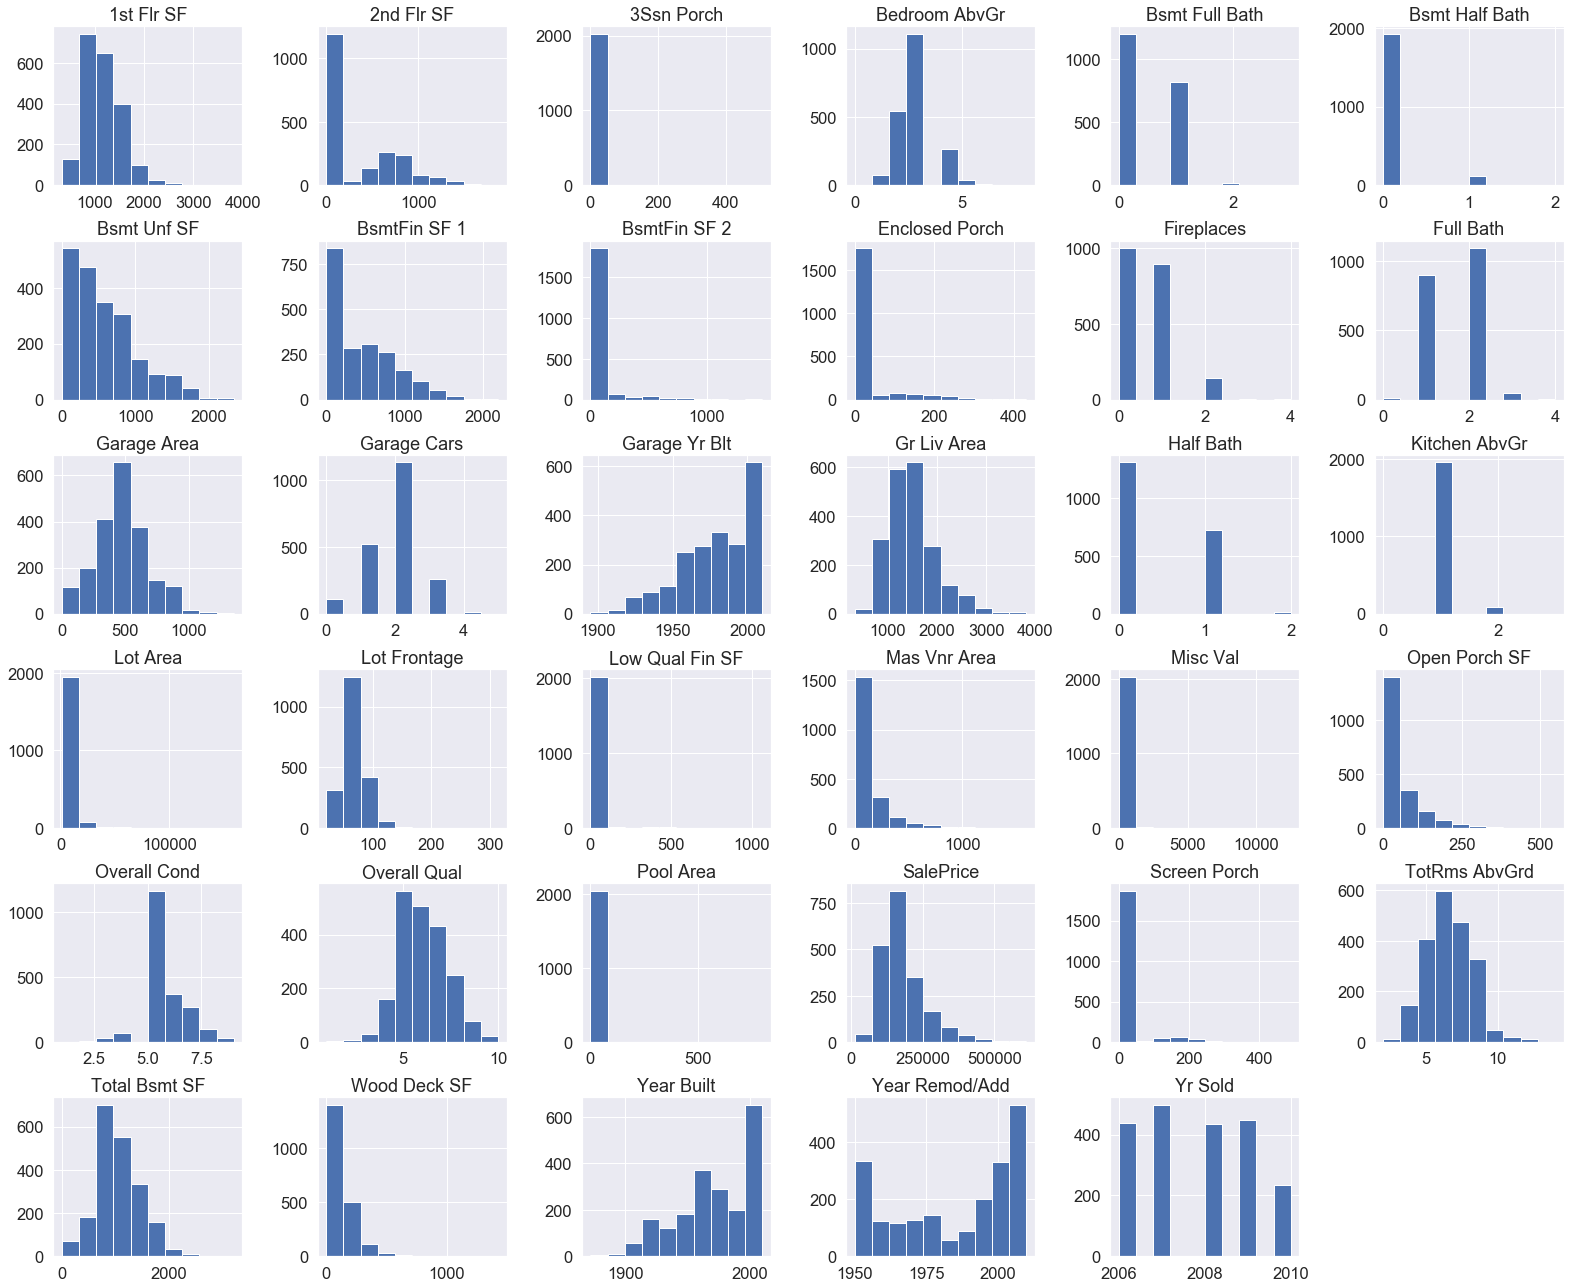

In [47]:
# Overview of distributions for numerical variables using histograms
plt.figure(facecolor='white')
train_df.hist(figsize=(22,18))
plt.tight_layout()
plt.show()

In [48]:
"""
# Examine distribution of target variable, SalePrice, by plotting histogram
fig = plt.figure(figsize=(14,6), facecolor='white')
plt.subplot(1,2,1)
ax1 = sns.distplot(train_df['SalePrice'], fit=stats.norm)
ax1.set_title('Histogram of SalePrice')
ax1.set_xlabel('SalePrice')
ax1.set_ylabel('KDE')

# Q-Q plot to check normality
plt.subplot(1,2,2)
ax2 = stats.probplot(train_df['SalePrice'], plot=plt)
plt.tight_layout()
"""

"\n# Examine distribution of target variable, SalePrice, by plotting histogram\nfig = plt.figure(figsize=(14,6), facecolor='white')\nplt.subplot(1,2,1)\nax1 = sns.distplot(train_df['SalePrice'], fit=stats.norm)\nax1.set_title('Histogram of SalePrice')\nax1.set_xlabel('SalePrice')\nax1.set_ylabel('KDE')\n\n# Q-Q plot to check normality\nplt.subplot(1,2,2)\nax2 = stats.probplot(train_df['SalePrice'], plot=plt)\nplt.tight_layout()\n"

We see that the distribution of our target variable, `SalePrice`, is a log-normal distribution. To reduce variance in standard errors, we are going to transform our target variable to a normal distribution using log transformation.

In [49]:
"""
# Apply log transformation to train and test data sets
train_df['SalePrice'] = train_df['SalePrice'].map(np.log)
"""

"\n# Apply log transformation to train and test data sets\ntrain_df['SalePrice'] = train_df['SalePrice'].map(np.log)\n"

In [50]:
"""
# Plot again to check distribution after transformation
fig = plt.figure(figsize=(14,6), facecolor='white')
plt.subplot(1,2,1)
ax1 = sns.distplot(train_df['SalePrice'], fit=stats.norm)
ax1.set_title('Histogram of SalePrice')
ax1.set_xlabel('SalePrice')
ax1.set_ylabel('KDE')

# Q-Q plot to check normality
plt.subplot(1,2,2)
ax2 = stats.probplot(train_df['SalePrice'], plot=plt)
plt.tight_layout()
"""

"\n# Plot again to check distribution after transformation\nfig = plt.figure(figsize=(14,6), facecolor='white')\nplt.subplot(1,2,1)\nax1 = sns.distplot(train_df['SalePrice'], fit=stats.norm)\nax1.set_title('Histogram of SalePrice')\nax1.set_xlabel('SalePrice')\nax1.set_ylabel('KDE')\n\n# Q-Q plot to check normality\nplt.subplot(1,2,2)\nax2 = stats.probplot(train_df['SalePrice'], plot=plt)\nplt.tight_layout()\n"

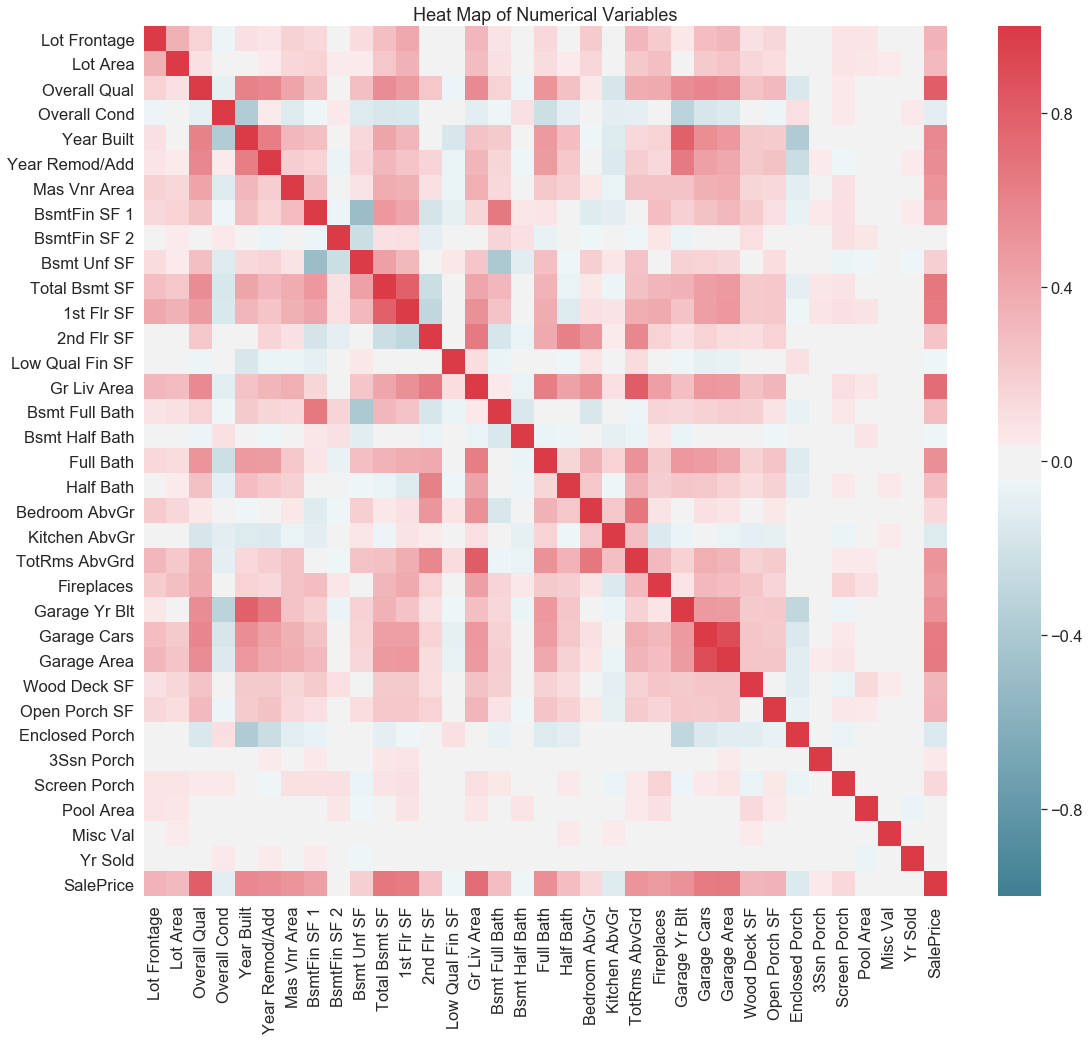

In [51]:
# Heat map to look at correlations
plt.figure(figsize=(18,16), facecolor='white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train_df.corr(), cmap=cmap, vmin=-1)
plt.title('Heat Map of Numerical Variables')
plt.show()

In [52]:
# Print variables with correlation coefficient of at least 0.5 to SalePrice
corr_mat = train_df.corr()
corr_mat_abs = abs(corr_mat['SalePrice'])
corr_mat['SalePrice'].get([i for i, v in enumerate(corr_mat_abs) if v > 0.5]).sort_values(ascending=False)

SalePrice        1.00
Overall Qual     0.80
Gr Liv Area      0.72
Total Bsmt SF    0.67
Garage Area      0.66
1st Flr SF       0.65
Garage Cars      0.65
Year Built       0.57
Year Remod/Add   0.55
Full Bath        0.54
Garage Yr Blt    0.52
Mas Vnr Area     0.51
TotRms AbvGrd    0.51
Name: SalePrice, dtype: float64

The following variables have the highest correlation with our target variable, `SalePrice`.

Variable|Type|Description|Correlation Coefficient to `SalePrice`
-|-|-|-
Overall Qual|Ordinal|Rates the overall material and finish of the house|0.83
Gr Liv Area|Continuous|Above grade (ground) living area square feet|0.71
Garage Cars|Discrete|Size of garage in car capacity|0.67
Total Bsmt SF|Continuous|Total square feet of basement area|0.66
Garage Area|Continuous|Size of garage in square feet|0.65
1st Flr SF|Continuous|First Floor square feet|0.63
Year Built|Discrete|Original construction date|0.62
Year Remod/Add|Discrete|Remodel date (same as construction date if no remodeling or additions)|0.60
Full Bath|Discrete|Full bathrooms above grade|0.57
Garage Yr Blt|Discrete|Year garage was built|0.55
TotRms AbvGrd|Discrete|Total rooms above grade (does not include bathrooms)|0.50

We are going to visualize their relationships with `SalePrice` below.

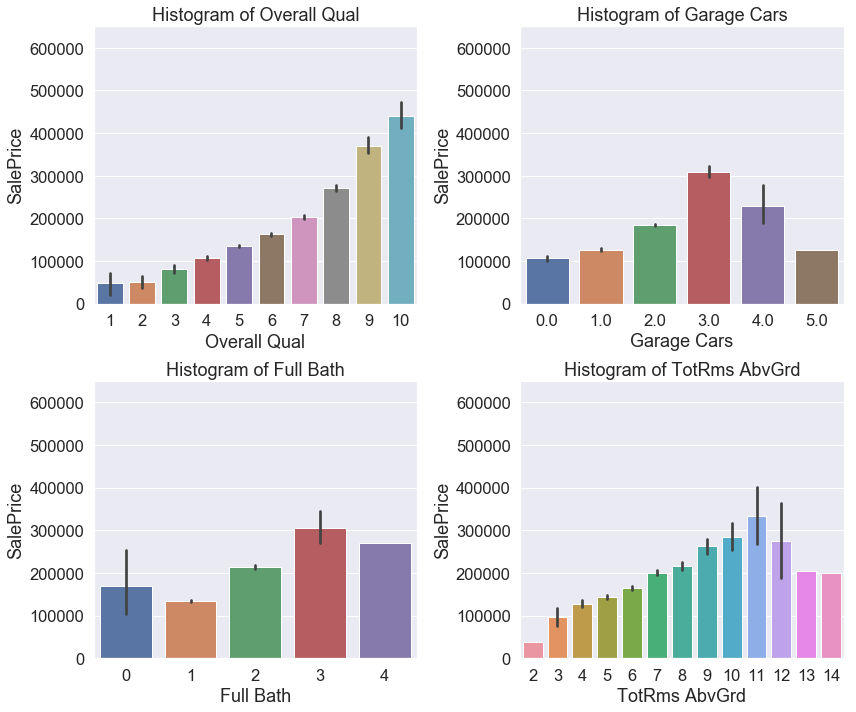

In [53]:
# Histograms for Overall Qual, Garage Cars and Full Bath
var = ['Overall Qual', 'Garage Cars', 'Full Bath', 'TotRms AbvGrd']
fig = plt.figure(figsize=(12,10), facecolor='white')
for i, v in enumerate(var):
    plt.subplot(2,2,i+1)
    sns.barplot(train_df[v], train['SalePrice']).axis(ymin=0, ymax=650000)
    plt.title('Histogram of {}'.format(v))
plt.tight_layout()

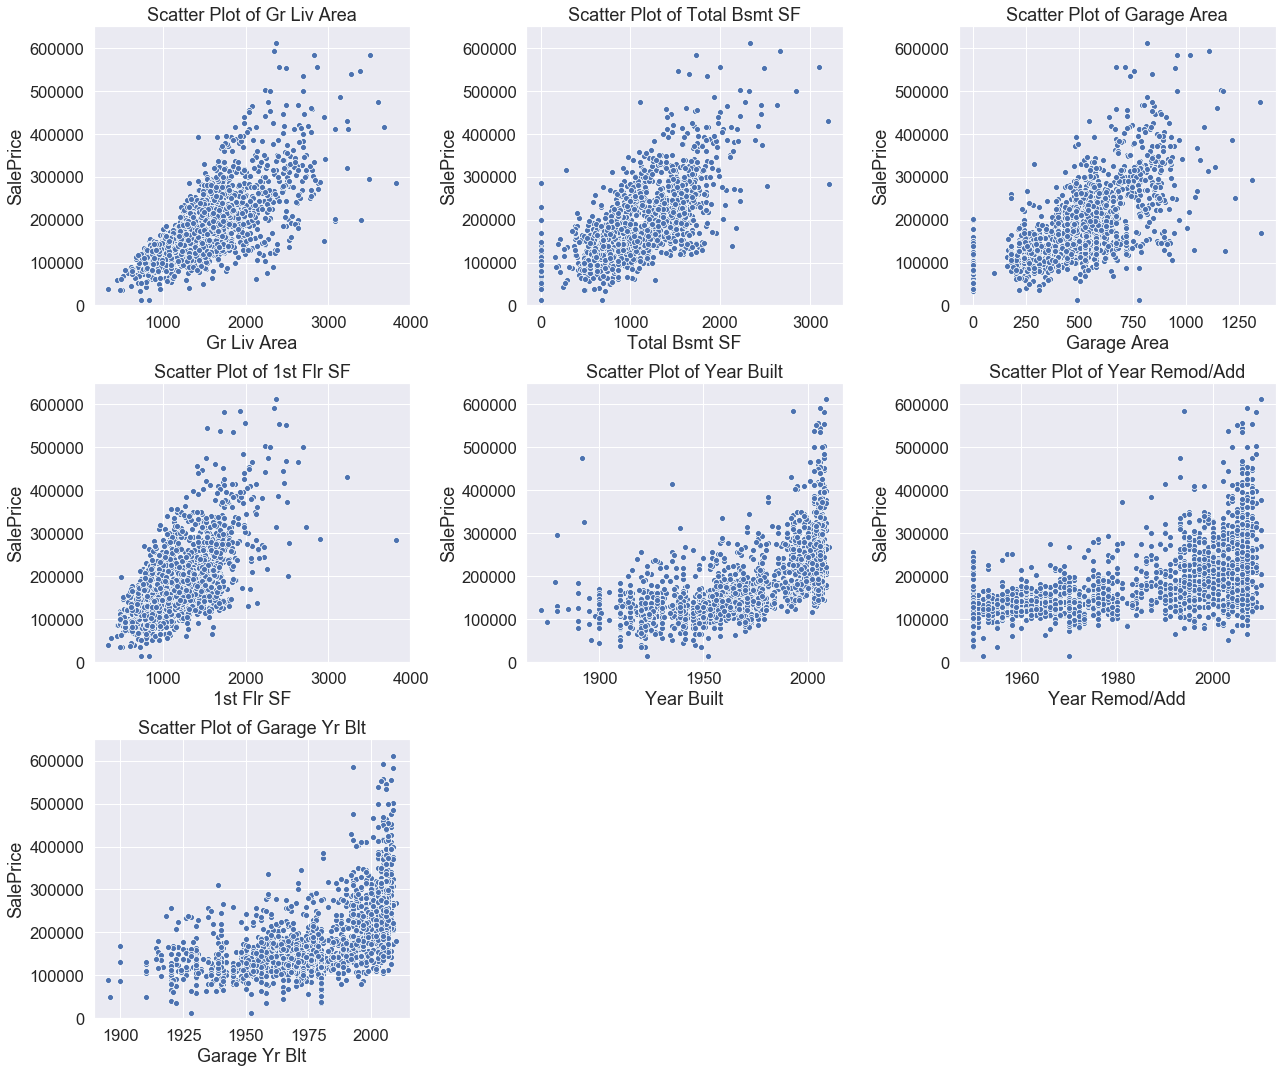

In [54]:
# Scatter plots for Gr Liv Area, Total Bsmt SF, Garage Area, 1st Flr SF, Year Built, Year Remod/Add and Garage Yr Blt
var = ['Gr Liv Area', 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt']
fig = plt.figure(figsize=(18,15), facecolor='white')
for i, v in enumerate(var):
    plt.subplot(3,3,i+1)
    sns.scatterplot(train_df[v], train['SalePrice']).axis(ymin=0, ymax=650000)
    plt.title('Scatter Plot of {}'.format(v))
plt.tight_layout()

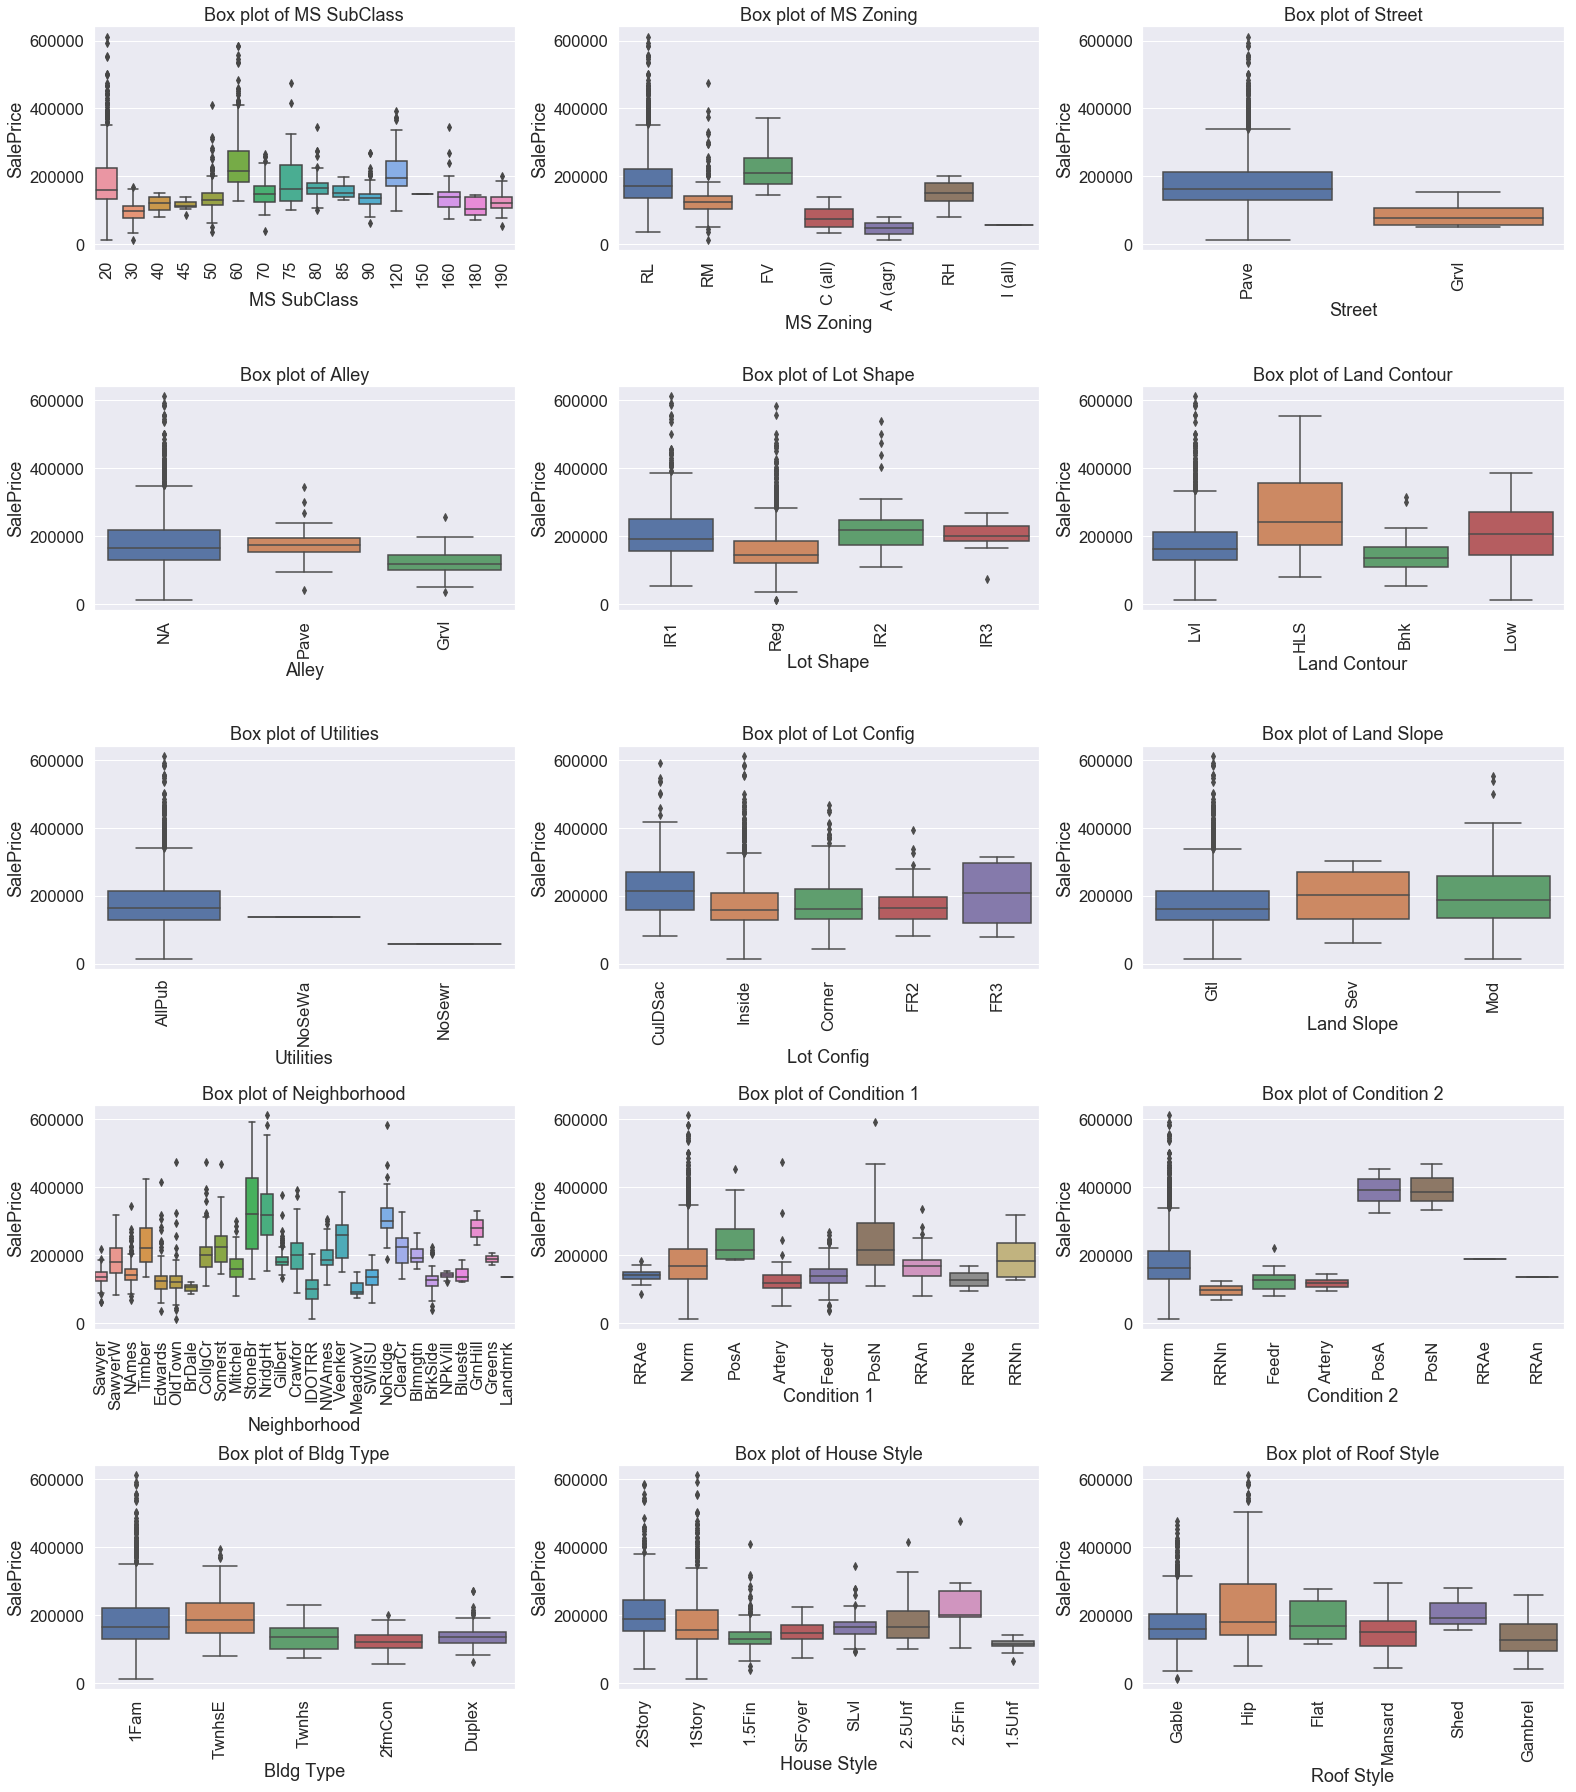

In [55]:
# Box plots for categorical variables - Part 1
var = [
    'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
    'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
    'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style'
]
fig = plt.figure(figsize=(22,25), facecolor='white')
for i, v in enumerate(var):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=v, y='SalePrice', data=train_df)
    plt.title('Box plot of {}'.format(v))   
    plt.xticks(rotation='vertical')
plt.tight_layout()    

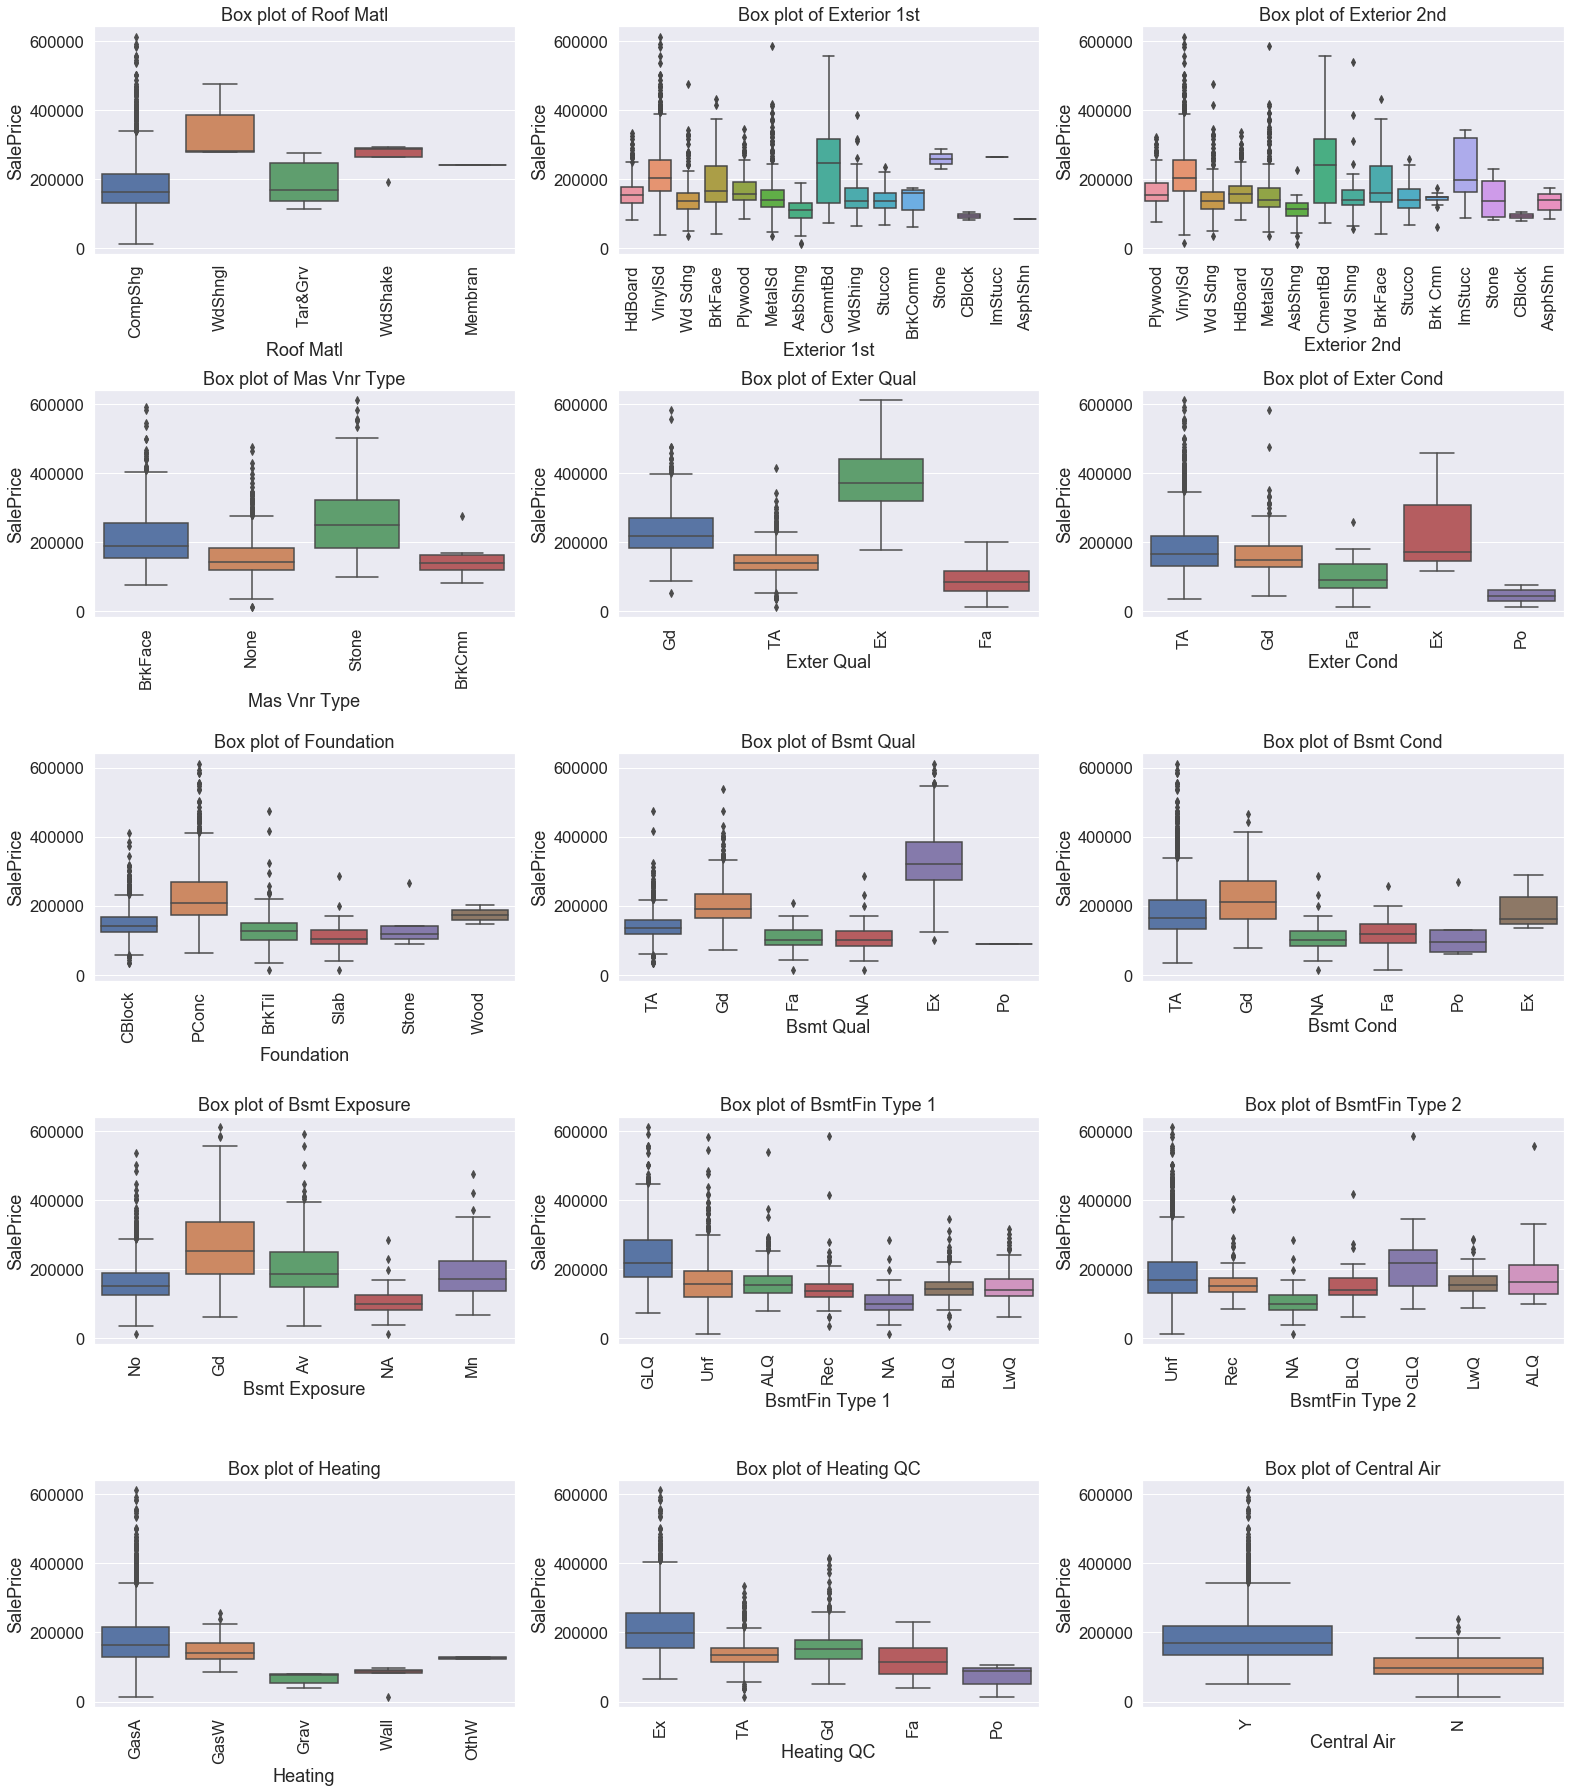

In [56]:
# Box plots for categorical variables - Part 2
var = [
    'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
    'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
    'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air'
]
fig = plt.figure(figsize=(22,25), facecolor='white')
for i, v in enumerate(var):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=v, y='SalePrice', data=train_df)
    plt.title('Box plot of {}'.format(v))   
    plt.xticks(rotation='vertical')
plt.tight_layout()

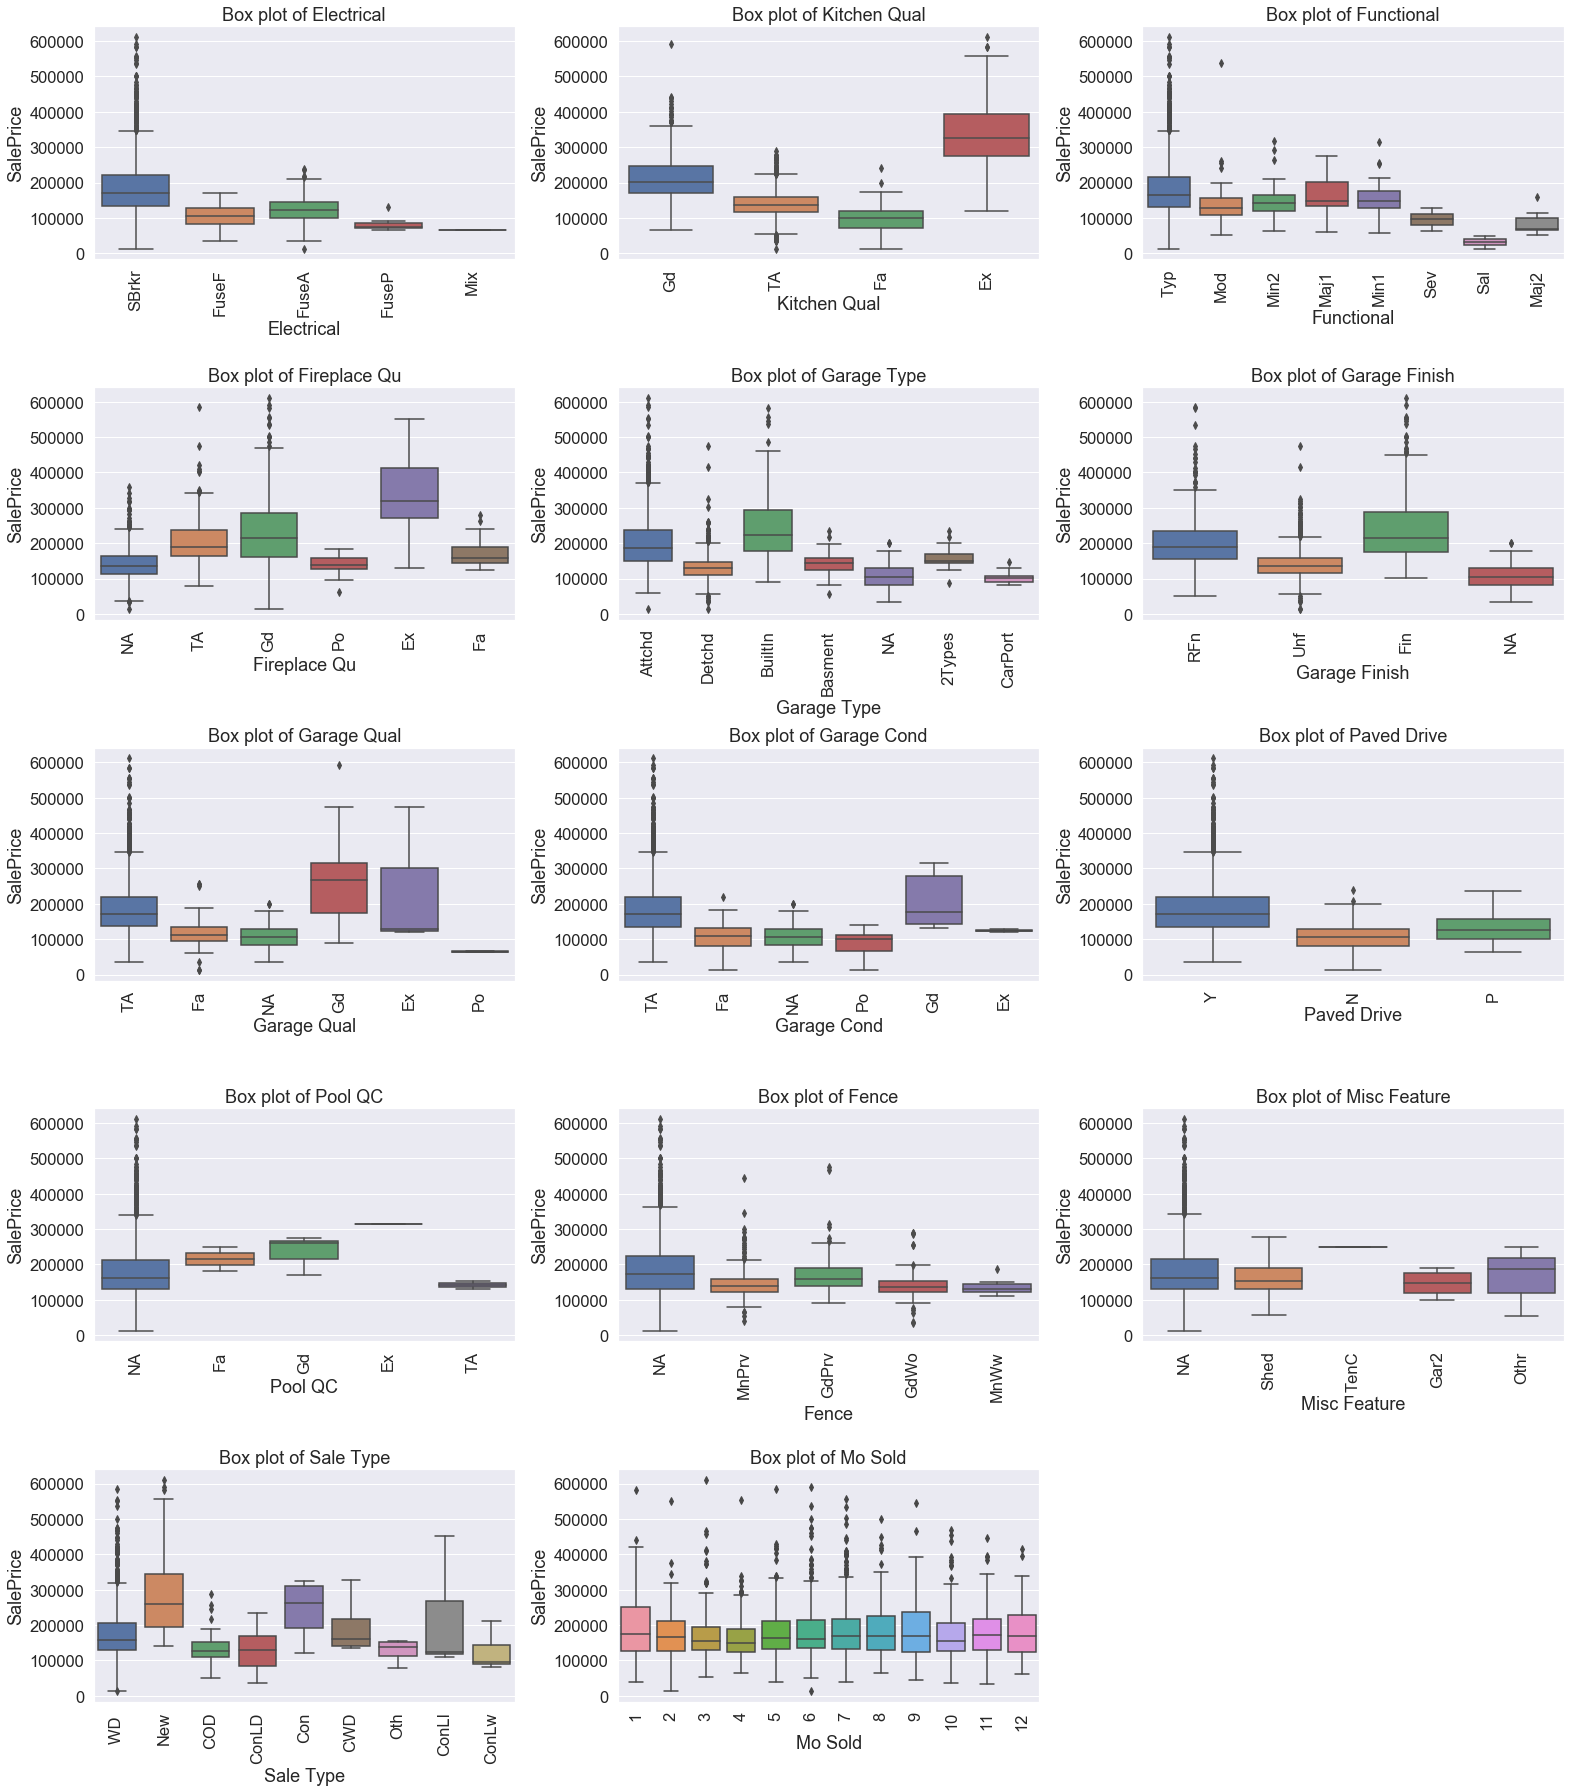

In [57]:
# Box plots for categorical variables - Part 3
var = [
    'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type',
    'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC',
    'Fence', 'Misc Feature', 'Sale Type', 'Mo Sold'
]
fig = plt.figure(figsize=(22,25), facecolor='white')
for i, v in enumerate(var):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=v, y='SalePrice', data=train_df)
    plt.title('Box plot of {}'.format(v))   
    plt.xticks(rotation='vertical')
plt.tight_layout()

## 4. Pre-processing
---

We will start by training the most complex model by creating dummies for categorical variables and including all features from the data set.

In [58]:
# Set train data for modeling
X = train_df.drop(columns='SalePrice')
y = train_df[['SalePrice']].values.ravel()

# Set test data for kaggle prediction
X_kaggle = test_df.copy()

In [59]:
# Create dummies for categorical variables
X = pd.get_dummies(X, drop_first=True)
X_kaggle = pd.get_dummies(X_kaggle, drop_first=True)

In [60]:
# For kaggle model, trim missing columns that are not in either data set
X_kaggle_train = X[[col for col in X_kaggle.columns if col in X.columns]]
X_kaggle_test = X_kaggle[[col for col in X_kaggle_train.columns]]

In [61]:
# Train/test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check train/test shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1639, 283), (410, 283), (1639,), (410,))

In [62]:
# Create pipelines for ridge and lasso
# Scale features before regression
ridge_pipe = Pipeline([
    ('scl', StandardScaler()),
    ('ridge', Ridge())
])

lasso_pipe = Pipeline([
    ('scl', StandardScaler()),
    ('lasso', Lasso())
])

## 5. Modeling
---

In [63]:
# Establish baseline score using median of target variable as predicted values
y_hat = [np.median(y_train) for i in y_test]
test_r2 = r2_score(y_true=y_test, y_pred=y_hat)
test_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_hat))
print('Baseline model using median')
print('Test R^2:', test_r2)
print('Test RMSE:', test_rmse)

Baseline model using median
Test R^2: -0.04280830560960469
Test RMSE: 78869.14057084004


In [64]:
# Fit linear regression
lr_m = LinearRegression()
score_cv = cross_val_score(lr_m, X_train, y_train, cv=5).mean()
lr_m.fit(X_train, y_train)
y_hat = lr_m.predict(X_test)
test_r2 = r2_score(y_true=y_test, y_pred=y_hat)
test_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_hat))
print('OLS Linear Regression')
print('Mean CV R^2:', score_cv)
print('Test R^2:', test_r2)
print('Test RMSE:', test_rmse)

OLS Linear Regression
Mean CV R^2: 0.900354387570607
Test R^2: 0.9251201117076008
Test RMSE: 21134.280224957532


In [65]:
# Fit ridge regression with default parameters
score_cv = cross_val_score(ridge_pipe, X_train, y_train, cv=5).mean()
ridge_pipe.fit(X_train, y_train)
y_hat = ridge_pipe.predict(X_test)
test_r2 = r2_score(y_true=y_test, y_pred=y_hat)
test_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_hat))
print('Ridge Default')
print('Mean CV R^2:', score_cv)
print('Test R^2:', test_r2)
print('Test RMSE:', test_rmse)

Ridge Default
Mean CV R^2: 0.9029346142793756
Test R^2: 0.9280180430790979
Test RMSE: 20721.285393656635


In [66]:
# Tune hyperparameters
# Set ridge parameters
ridge_param = {
    'ridge__alpha': np.logspace(0, 5, 200)
}

# Set grid search to get best model
ridge_grid = GridSearchCV(
    ridge_pipe,
    param_grid = ridge_param,
    cv = 5,
    n_jobs = -1)

# Fit, score and predict tuned ridge
%time ridge_grid.fit(X_train, y_train)
score_cv = ridge_grid.best_score_
y_hat = ridge_grid.predict(X_test)
test_r2 = r2_score(y_true=y_test, y_pred=y_hat)
test_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_hat))
print('Ridge Tuned')
print('Mean CV R^2:', score_cv)
print('Test R^2:', test_r2)
print('Test RMSE:', test_rmse)

Wall time: 29.6 s
Ridge Tuned
Mean CV R^2: 0.9086615259154949
Test R^2: 0.9305983013842262
Test RMSE: 20346.509598325032


In [67]:
# Fit lasso regression with default parameters
score_cv = cross_val_score(lasso_pipe, X_train, y_train, cv=5).mean()
lasso_pipe.fit(X_train, y_train)
y_hat = lasso_pipe.predict(X_test)
test_r2 = r2_score(y_true=y_test, y_pred=y_hat)
test_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_hat))
print('Lasso Default')
print('Mean CV R^2:', score_cv)
print('Test R^2:', test_r2)
print('Test RMSE:', test_rmse)

C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

Lasso Default
Mean CV R^2: 0.9015701410086125
Test R^2: 0.9239586459944155
Test RMSE: 21297.55695463697


C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [68]:
# Set lasso parameters
lasso_param = {
    'lasso__alpha': np.logspace(-4, 3, 100)
}

# Set grid search to get best model
lasso_grid = GridSearchCV(
    lasso_pipe,
    param_grid = lasso_param,
    cv = 5,
    n_jobs = -1)

# Fit, score and predict tuned lasso
%time lasso_grid.fit(X_train, y_train)
score_cv = lasso_grid.best_score_
y_hat = lasso_grid.predict(X_test)
test_r2 = r2_score(y_true=y_test, y_pred=y_hat)
test_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_hat))
print('Lasso Tuned')
print('Mean CV R^2:', score_cv)
print('Test R^2:', test_r2)
print('Test RMSE:', test_rmse)

Wall time: 1min 16s
Lasso Tuned
Mean CV R^2: 0.9139391068499967
Test R^2: 0.9302606879486228
Test RMSE: 20395.938656336406


We are going to reduce the number of features from our previous model by using numeric to represent some of our ordinal variables.

In [69]:
# Reduce number of features
# Make a copy of data sets
train2_df = train_df.copy()
test2_df = test_df.copy()

# Represent ordinal features as numeric (train)
train2_df = train2_df.replace({
    'Lot Shape': {
        'Reg': 4,
        'IR1': 3,
        'IR2': 2,
        'IR3': 1
    },
    'Utilities': {
        'AllPub': 4,
        'NoSeWa': 3,
        'NoSewr': 2,
        'ELO': 1
    },
    'Land Slope': {
        'Gtl': 3,
        'Mod': 2,
        'Sev': 1
    },
    'Exter Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Exter Cond': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Bsmt Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'Bsmt Cond': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'Bsmt Exposure': {
        'Gd': 3, 
        'Av': 2, 
        'Mn': 1,
        'No': 0,
        'NA': 0
    },
    'BsmtFin Type 1': {
        'GLQ': 5, 
        'ALQ': 4, 
        'BLQ': 3, 
        'Rec': 2,
        'LwQ': 1,
        'Unf': 0,
        'NA': 0
    },
    'BsmtFin Type 2': {
        'GLQ': 5, 
        'ALQ': 4, 
        'BLQ': 3, 
        'Rec': 2,
        'LwQ': 1,
        'Unf': 0,
        'NA': 0
    },
    'Heating QC': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Electrical': {
        'SBrkr': 5,
        'FuseA': 4,
        'FuseF': 3,
        'FuseP': 2,
        'Mix': 1
    },
    'Kitchen Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Functional': {
        'Typ': 8,
        'Min1': 7,
        'Min2': 6,
        'Mod': 5,
        'Maj1': 4,
        'Maj2': 3,
        'Sev': 2,
        'Sal': 1
    },
    'Fireplace Qu': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0 
    },
    'Garage Finish': {
        'Fin': 3, 
        'RFn': 2, 
        'Unf': 1, 
        'NA': 0
    },
    'Garage Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },    
    'Garage Cond': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },                        
    'Paved Drive': {
        'Y': 3,
        'P': 2,
        'N': 1
    },
    'Pool QC': {
        'Ex': 4, 
        'Gd': 3, 
        'TA': 2, 
        'Fa': 1,
        'NA': 0
    },    
    'Fence': {
        'GdPrv': 4, 
        'GdWo': 3, 
        'MnPrv': 2, 
        'MnWw': 1,
        'NA': 0
    },
})

In [70]:
# Represent ordinal features as numeric (test)
test2_df = test2_df.replace({
    'Lot Shape': {
        'Reg': 4,
        'IR1': 3,
        'IR2': 2,
        'IR3': 1
    },
    'Utilities': {
        'AllPub': 4,
        'NoSeWa': 3,
        'NoSewr': 2,
        'ELO': 1
    },
    'Land Slope': {
        'Gtl': 3,
        'Mod': 2,
        'Sev': 1
    },
    'Exter Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Exter Cond': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Bsmt Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'Bsmt Cond': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'Bsmt Exposure': {
        'Gd': 3, 
        'Av': 2, 
        'Mn': 1,
        'No': 0,
        'NA': 0
    },
    'BsmtFin Type 1': {
        'GLQ': 5, 
        'ALQ': 4, 
        'BLQ': 3, 
        'Rec': 2,
        'LwQ': 1,
        'Unf': 0,
        'NA': 0
    },
    'BsmtFin Type 2': {
        'GLQ': 5, 
        'ALQ': 4, 
        'BLQ': 3, 
        'Rec': 2,
        'LwQ': 1,
        'Unf': 0,
        'NA': 0
    },
    'Heating QC': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Electrical': {
        'SBrkr': 5,
        'FuseA': 4,
        'FuseF': 3,
        'FuseP': 2,
        'Mix': 1
    },
    'Kitchen Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1
    },
    'Functional': {
        'Typ': 8,
        'Min1': 7,
        'Min2': 6,
        'Mod': 5,
        'Maj1': 4,
        'Maj2': 3,
        'Sev': 2,
        'Sal': 1
    },
    'Fireplace Qu': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0 
    },
    'Garage Finish': {
        'Fin': 3, 
        'RFn': 2, 
        'Unf': 1, 
        'NA': 0
    },
    'Garage Qual': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },    
    'Garage Cond': {
        'Ex': 5, 
        'Gd': 4, 
        'TA': 3, 
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },                        
    'Paved Drive': {
        'Y': 3,
        'P': 2,
        'N': 1
    },
    'Pool QC': {
        'Ex': 4, 
        'Gd': 3, 
        'TA': 2, 
        'Fa': 1,
        'NA': 0
    },    
    'Fence': {
        'GdPrv': 4, 
        'GdWo': 3, 
        'MnPrv': 2, 
        'MnWw': 1,
        'NA': 0
    },
})

In [71]:
# Model again using revised features
# Set train data for modeling
X = train2_df.drop(columns='SalePrice')
y = train2_df[['SalePrice']].values.ravel()

# Set test data for kaggle prediction
X_kaggle = test2_df.copy()

# Create dummies for categorical variables
X = pd.get_dummies(X, drop_first=True)
X_kaggle = pd.get_dummies(X_kaggle, drop_first=True)

# For kaggle model, trim missing columns that are not in either data set
X_kaggle_train = X[[col for col in X_kaggle.columns if col in X.columns]]
X_kaggle_test = X_kaggle[[col for col in X_kaggle_train.columns]]

# Train/test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check train/test shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1639, 223), (410, 223), (1639,), (410,))

In [72]:
# Fit linear regression
lr_m = LinearRegression()
score_cv = cross_val_score(lr_m, X_train, y_train, cv=5).mean()
lr_m.fit(X_train, y_train)
y_hat = lr_m.predict(X_test)
test_r2 = r2_score(y_true=y_test, y_pred=y_hat)
test_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_hat))
print('OLS Linear Regression 2')
print('Mean CV R^2:', score_cv)
print('Test R^2:', test_r2)
print('Test RMSE:', test_rmse)

OLS Linear Regression 2
Mean CV R^2: 0.9033196307168009
Test R^2: 0.9225608680172883
Test RMSE: 21492.409455107936


In [73]:
# Fit, score and predict with ridge grid test
%time ridge_grid.fit(X_train, y_train)
score_cv = ridge_grid.best_score_
y_hat = ridge_grid.predict(X_test)
test_r2 = r2_score(y_true=y_test, y_pred=y_hat)
test_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_hat))
print('Ridge Tuned 2')
print('Mean CV R^2:', score_cv)
print('Test R^2:', test_r2)
print('Test RMSE:', test_rmse)

Wall time: 20.8 s
Ridge Tuned 2
Mean CV R^2: 0.9089218205208981
Test R^2: 0.9259203469186575
Test RMSE: 21021.046725293796


In [74]:
# Fit, score and predict with lasso grid test
%time lasso_grid.fit(X_train, y_train)
score_cv = lasso_grid.best_score_
y_hat = lasso_grid.predict(X_test)
test_r2 = r2_score(y_true=y_test, y_pred=y_hat)
test_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_hat))
print('Lasso Tuned 2')
print('Mean CV R^2:', score_cv)
print('Test R^2:', test_r2)
print('Test RMSE:', test_rmse)

Wall time: 1min 24s
Lasso Tuned 2
Mean CV R^2: 0.9128968866945361
Test R^2: 0.9249821412578625
Test RMSE: 21153.741820516243


Interestingly, both R^2 and RMSE scores became worse after reducing the number of features by using numeric to represent some of our ordinal variables. The regularization was highly effective in preventing overfitting and we obtained our best models by using all available features.

However, for interpretability, we are going to use our tuned ridge model with numeric ordinal features as our production model to make inference.

In [75]:
# Prepare kaggle submission
# Set train data for modeling using our original features
X = train_df.drop(columns='SalePrice')
y = train_df[['SalePrice']].values.ravel()

# Set test data for kaggle prediction
X_kaggle = test2_df.copy()

# Create dummies for categorical variables
X = pd.get_dummies(X, drop_first=True)
X_kaggle = pd.get_dummies(X_kaggle, drop_first=True)

# For kaggle model, trim missing columns that are not in either data set
X_kaggle_train = X[[col for col in X_kaggle.columns if col in X.columns]]
X_kaggle_test = X_kaggle[[col for col in X_kaggle_train.columns]]

# Train ridge tuned model and predict with best found parameters
ridge_grid.fit(X_kaggle_train, y)
y_hat = ridge_grid.predict(X_kaggle_test)

# Put into submission format
sample_sub = pd.DataFrame(data={
    'Id': test['Id'],
    'SalePrice': y_hat
})

# Write to csv
sample_sub.to_csv('./data/submission_ridge.csv', index=False)

In [76]:
# Train lasso tuned model and predict with best found parameters
lasso_grid.fit(X_kaggle_train, y)
y_hat = lasso_grid.predict(X_kaggle_test)

# Put into submission format
sample_sub = pd.DataFrame(data={
    'Id': test['Id'],
    'SalePrice': y_hat
})

# Write to csv
sample_sub.to_csv('./data/submission_lasso.csv', index=False)

## 6. Inferential Visualizations
---

Text(0, 0.5, 'Features')

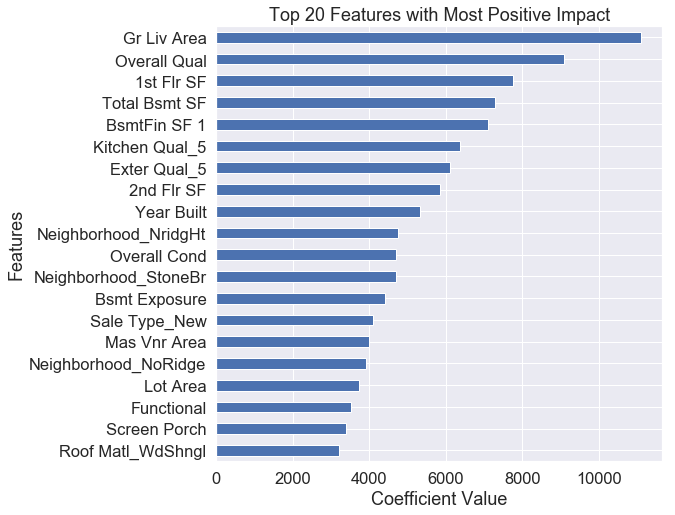

In [78]:
# Look at feature loadings
# Re-initiate model
X = train2_df.drop(columns='SalePrice')
y = train2_df[['SalePrice']].values.ravel()
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_grid.fit(X_train, y_train)

# Get coefficients
coefs = ridge_pipe.set_params(ridge__alpha=ridge_grid.best_params_.get('ridge__alpha')).fit(X_train, y_train).named_steps.ridge.coef_
coef_df = pd.DataFrame({'coef': coefs}, index=X_test.columns)
coef_df.sort_values(by='coef', inplace=True)

# Plot top 20 positive features
plt.figure(figsize=(8,8), facecolor='white')
coef_df['coef'].tail(20).plot(kind='barh')
plt.title('Top 20 Features with Most Positive Impact')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

Text(0, 0.5, 'Features')

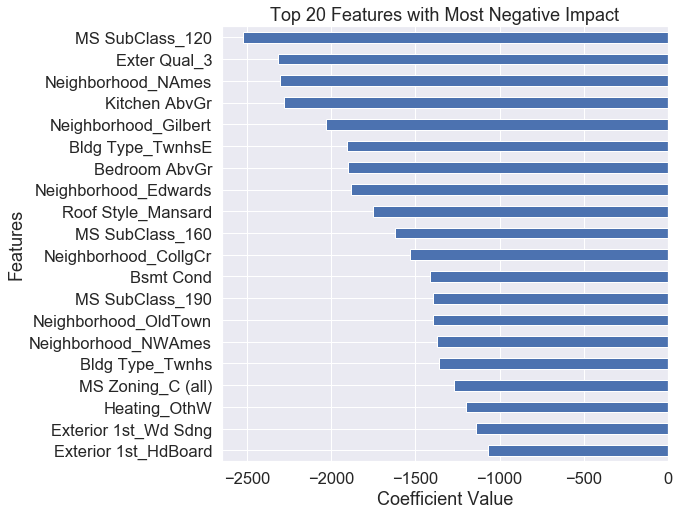

In [79]:
# Plot top 20 negative features
coef_df.sort_values(by='coef', ascending=False, inplace=True)
plt.figure(figsize=(8,8), facecolor='white')
coef_df['coef'].tail(20).plot(kind='barh')
plt.title('Top 20 Features with Most Negative Impact')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

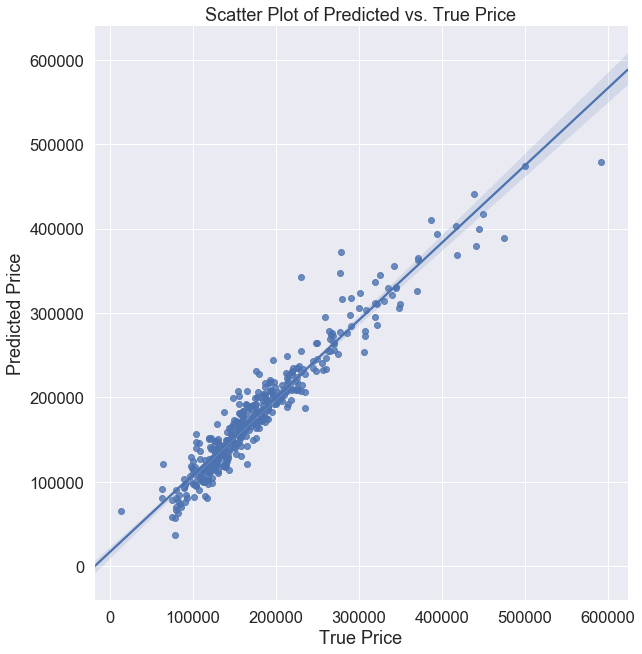

In [80]:
# Look at prediction accuracy
y_hat = ridge_grid.predict(X_test)
plot_df = pd.DataFrame()
plot_df['true'], plot_df['pred'] = y_test, y_hat
sns.lmplot(x='true', y='pred', data=plot_df, height=9)
plt.title('Scatter Plot of Predicted vs. True Price')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.show()

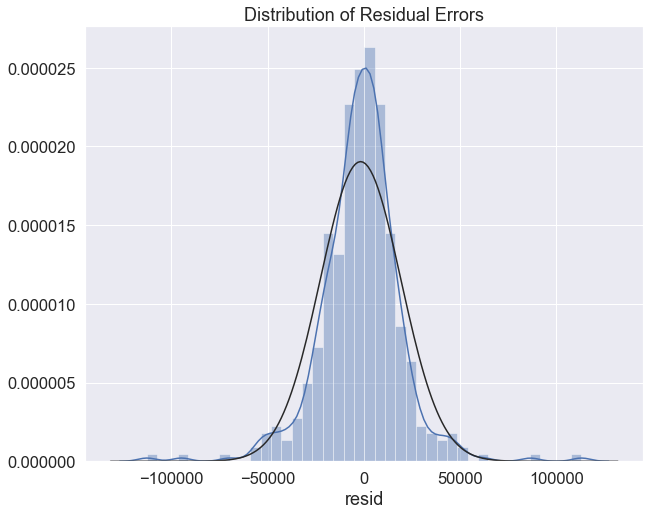

In [81]:
# Check whether the residual errors follow a normal distribution?
plot_df['resid'] = plot_df['true'] - plot_df['pred']
plt.figure(figsize=(10,8), facecolor='white')
sns.distplot(plot_df['resid'], fit=stats.norm)
plt.title('Distribution of Residual Errors')
plt.show()

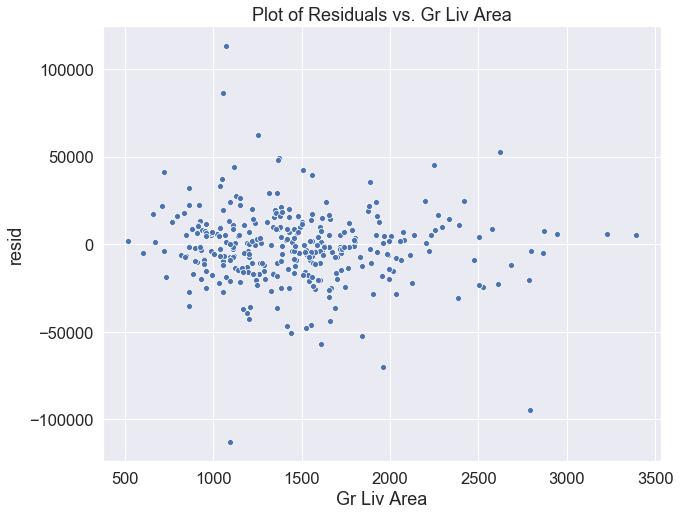

In [83]:
# Equality of variance
plot_df['Gr Liv Area'] = X_train['Gr Liv Area']
plt.figure(figsize=(10,8), facecolor='white')
sns.scatterplot(x='Gr Liv Area', y='resid', data=plot_df)
plt.title('Plot of Residuals vs. Gr Liv Area')
plt.show()

## 7. Business Recommendations
---

In [84]:
coef_df.sort_values(by='coef', ascending=False).head(20)

,coef
Gr Liv Area,"11,100.06"
Overall Qual,"9,087.43"
1st Flr SF,"7,759.39"
Total Bsmt SF,"7,271.33"
BsmtFin SF 1,"7,103.56"
Kitchen Qual_5,"6,379.71"
Exter Qual_5,"6,099.99"
2nd Flr SF,"5,843.53"
Year Built,"5,320.32"
Neighborhood_NridgHt,"4,747.09"


In [85]:
coef_df.sort_values(by='coef', ascending=True).head(20)

,coef
MS SubClass_120,"-2,524.60"
Exter Qual_3,"-2,313.32"
Neighborhood_NAmes,"-2,305.48"
Kitchen AbvGr,"-2,279.74"
Neighborhood_Gilbert,"-2,031.19"
Bldg Type_TwnhsE,"-1,906.91"
Bedroom AbvGr,"-1,902.09"
Neighborhood_Edwards,"-1,883.71"
Roof Style_Mansard,"-1,751.64"
MS SubClass_160,"-1,620.46"


#### Which features appear to add the most value to a home?
- The size of a home, such as above ground living area, first floor and basement area. For instance, a 1 square foot increase in above ground living area will on average increase \$11000 in value to a home. 
- Overall quality rating of the material and finish of a house - a 1 unit increase in the quality rating will increase the value to a home by around \$9000.
- Kitchen quality - having a kitchen with an excellent quality rating will add \$6300 on average to the value of a home.

#### Which features hurt the value of a home the most?
- Being a 1-story planned unit development hurts the value of a home by \$2500 on average when compared to a 1-story house built after 1946.
- A house with average/typical quality of the material on the exterior reduces its value by around \$2300.
- For a house located in North Ames, its value is expected to be lower by \$2300 in comparison to a house located in Bloomington Heights.

#### What are things that homeowners could improve in their homes to increase the value?
- Build a fully-furnished kitchen to increase its quality.
- Regular exterior maintenance to improve the quality of the material and finish of a house.

#### What neighborhoods seem like they might be a good investment?
- Northridge Heights
- Stone Brook
- Northridge

#### Do you feel that this model will generalize to other cities?
- It depends on factors such as whether other cities have similar building types to Ames. I suspect the model will not work as well on cities with a high-density of high-rise apartments as many of the features in our current model are biased towards bungalows.
- Features related to Ames city, such as neighborhood, will also have to be removed.

#### How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?
- I can group related features to generalize the model even further, such as overall size of home, binary variables for facilities, or distance to points of interests such as schools, supermarkets, etc.